# KOSMI 예제를 Keras 로 바꿔보기 

google drive mount 

In [0]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

In [0]:
ls gdrive/My\ Drive

'Colab Notebooks'/   dataset/   foo.txt   Keras/


In [0]:
import PIL 
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [0]:
# 랜덤시드 고정시키기
np.random.seed(3)

# 데이터셋 생성하기 
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'gdrive/My Drive/dataset/KOSMI_tutorial/retinopathy_dataset_resize/train',
        target_size=(128, 128),
        batch_size=64,
        class_mode='binary') 

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'gdrive/My Drive/dataset/KOSMI_tutorial/retinopathy_dataset_resize/test',
        target_size=(128, 128),    
        batch_size=64,
        class_mode='binary')

Found 1230 images belonging to 2 classes.
Found 292 images belonging to 2 classes.


In [0]:
# 모델 구성 
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 0, 1 의 이진분류 

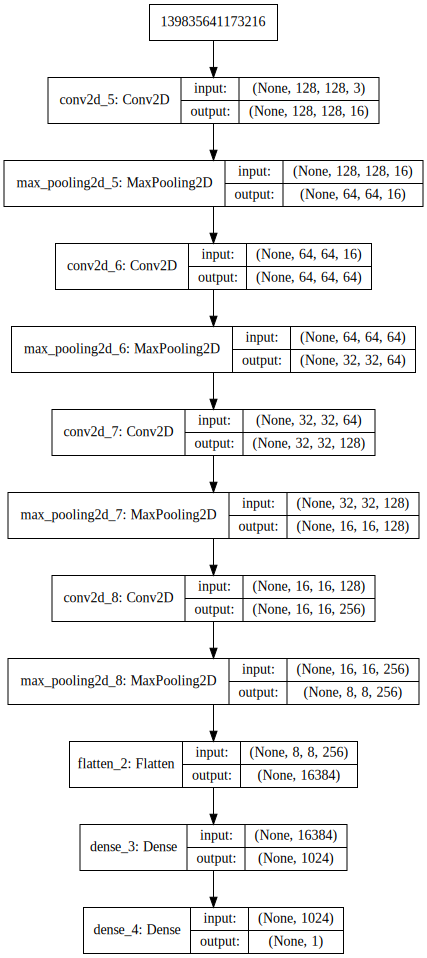

In [0]:
# 모델 시각화 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
# 모델 학습과정 설정 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기종료함수 
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 20) # 조기종료 콜백함수 정의

In [0]:
# 모델 학습시키기 
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=20,  # train sample 1230, batch size 64
        epochs=100,
        validation_data=test_generator,
        validation_steps=5, # test sample 292, batch size 64
        callbacks=[early_stopping]
        )  

Epoch 1/100
20/20 [==============================] - 5s 232ms/step - loss: 0.7306 - acc: 0.4870 - val_loss: 0.6938 - val_acc: 0.4932
Epoch 2/100
20/20 [==============================] - 3s 170ms/step - loss: 0.6932 - acc: 0.5066 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 3/100
20/20 [==============================] - 3s 174ms/step - loss: 0.6933 - acc: 0.4967 - val_loss: 0.6934 - val_acc: 0.4897
Epoch 4/100
20/20 [==============================] - 3s 172ms/step - loss: 0.6929 - acc: 0.5150 - val_loss: 0.6917 - val_acc: 0.5308
Epoch 5/100
20/20 [==============================] - 3s 175ms/step - loss: 0.6938 - acc: 0.5258 - val_loss: 0.6932 - val_acc: 0.5308
Epoch 6/100
20/20 [==============================] - 3s 174ms/step - loss: 0.6938 - acc: 0.5276 - val_loss: 0.6932 - val_acc: 0.5548
Epoch 7/100
20/20 [==============================] - 3s 173ms/step - loss: 0.6918 - acc: 0.5060 - val_loss: 0.6908 - val_acc: 0.5342
Epoch 8/100
20/20 [==============================] - 4s 176ms/step - 

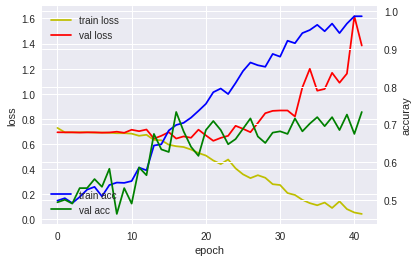

In [0]:
# 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 모델 평가하기 
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 70.55%


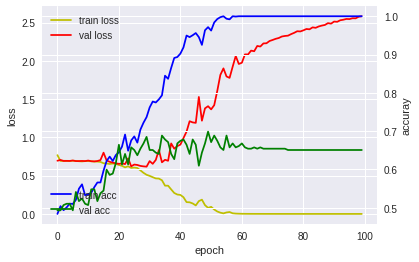

In [0]:
# 모델 학습 과정 표시하기 (epochs=100)
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
# 모델 평가하기 (epochs=100)
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 64.73%


In [0]:
# 모델 사용하기 
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'0': 0, '1': 1}
[[0.330]
 [0.000]
 [1.000]
 [0.002]
 [0.999]
 [0.000]
 [0.235]
 [0.676]
 [1.000]
 [0.050]
 [0.000]
 [0.007]
 [0.213]
 [0.000]
 [0.996]
 [0.001]
 [0.000]
 [0.084]
 [1.000]
 [0.000]
 [0.662]
 [0.022]
 [0.025]
 [0.610]
 [0.004]
 [0.470]
 [0.000]
 [0.990]
 [0.995]
 [1.000]
 [0.000]
 [0.012]
 [0.999]
 [0.997]
 [0.001]
 [0.993]
 [0.891]
 [0.000]
 [1.000]
 [0.007]
 [0.043]
 [0.983]
 [0.103]
 [0.000]
 [0.998]
 [0.000]
 [0.185]
 [1.000]
 [0.350]
 [0.364]
 [0.988]
 [0.972]
 [0.000]
 [0.052]
 [0.256]
 [0.000]
 [0.898]
 [0.949]
 [0.000]
 [0.002]
 [0.849]
 [0.116]
 [1.000]
 [0.213]
 [0.479]
 [0.233]
 [0.952]
 [0.145]
 [0.995]
 [0.090]
 [0.993]
 [0.000]
 [1.000]
 [0.999]
 [0.001]
 [0.651]
 [0.517]
 [0.781]
 [0.828]
 [0.074]
 [0.996]
 [1.000]
 [0.066]
 [0.000]
 [0.000]
 [0.357]
 [0.037]
 [0.003]
 [0.470]
 [0.968]
 [0.000]
 [0.043]
 [0.999]
 [0.001]
 [0.000]
 [0.000]
 [0.001]
 [0.999]
 [0.427]
 [0.345]
 [1.000]
 [0.997]
 [0.001]
 [0.973]
 [0.000]
 [0.002]
 [0.000]
 [1.00